In [69]:
import numpy as np
import pandas as pd
from typing import Literal
import matplotlib.pyplot as plt

In [104]:
class KMeansClustering:
    def __init__(self, distance: Literal["euclidean", "manhattan", "minkowski"], k:int=2, maxIterations:int=100, seed=819):
        self.k = k
        self.maxIterations = maxIterations
        self.distance = distance
        self.seed = seed
        self.centroids = None
        if distance == 'euclidean':
            self.p = 2
        elif distance == 'manhattan':
            self.p = 1
        elif distance == 'minkowski':
            self.p = 3
        np.random.seed(self.seed)
    
    def calcDistance(self, a, b):
        return np.sum(np.abs(a - b) ** self.p) ** (1/self.p)
    
    def fit(self, data):
        
        n = len(data)
        iteration = 0
        prev_centroids = None
        centroids = [data[i * data.shape[0] // k] for i in range(self.k)]
        
        while iteration < self.maxIterations:

            if prev_centroids is not None and np.allclose(prev_centroids, centroids):
                break

            assignment = [0] * n
            for idx in range(n):
                distances = []
                for centroid in centroids:
                    distances.append(self.calcDistance(data[idx], centroid))
                assignment[idx] = np.argmin(distances)
            
            prev_centroids = centroids.copy()

            for i in range(self.k):
                ind = [j for j in range(n) if assignment[j] == i]

                if ind:
                    centroids[i] = np.mean(data[ind], axis=0)
                else:
                    centroids[i] = np.zeros(data[0].shape)
            
            iteration += 1
        
        self.centroids = centroids
    
    def predict(self, data, centroids=None):
        if not centroids:
            centroids = self.centroids

        if not centroids:
            return
        
        labels = []
        for row in data:
            distances = []
            for centroid in centroids:
                distances.append(self.calcDistance(row, centroid))
            labels.append(int(np.argmin(distances)))
        return labels
    
    def SSE(self, data, centroids=None):
        if not centroids:
            centroids = self.centroids
        
        labels = self.predict(data, centroids)
        sse = 0
        for i in range(self.k):
            ind = [data[j] for j in range(len(data)) if labels[j] == i]
            for row in ind:
                sse += np.sum((row - centroids[i])**2)
        
        return sse



In [63]:
df = pd.read_csv('datasets/q1_data.csv')

In [64]:
df.head()

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14


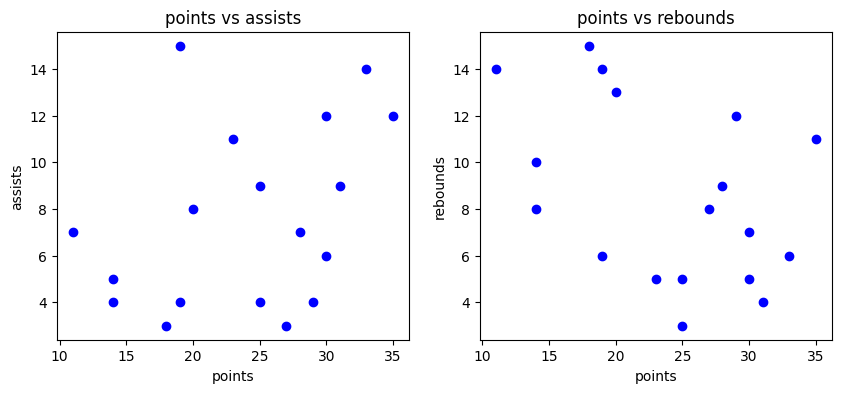

In [80]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(df['points'], df['assists'], c='blue')
ax1.set_title('points vs assists')
ax1.set_xlabel('points')
ax1.set_ylabel('assists')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(df['points'], df['rebounds'], c='blue')
ax2.set_title('points vs rebounds')
ax2.set_xlabel('points')
ax2.set_ylabel('rebounds')

plt.show()

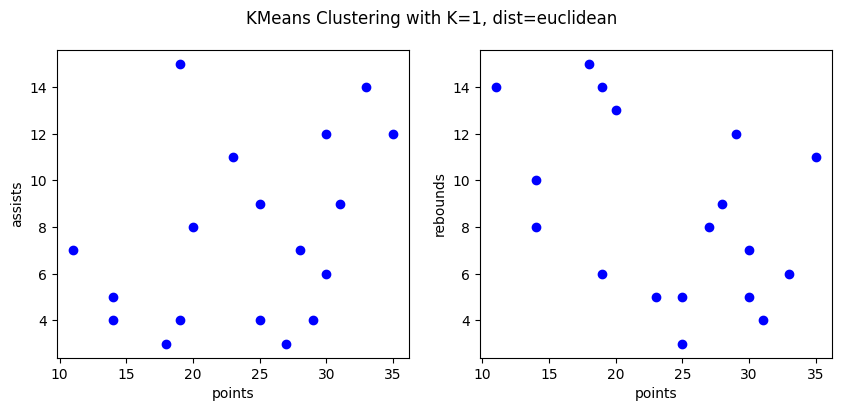

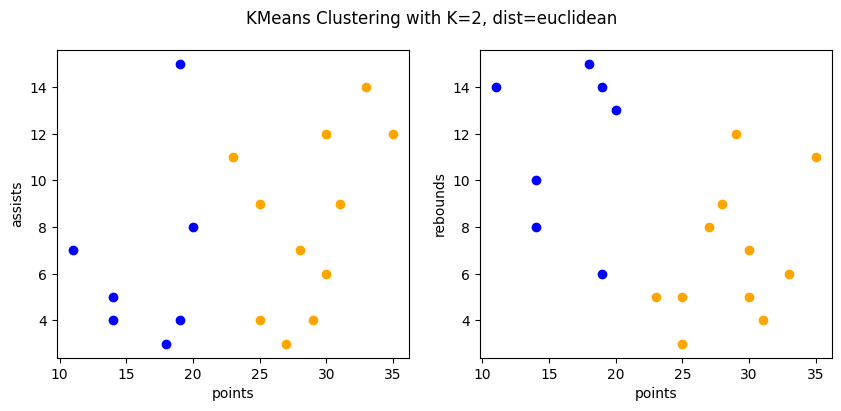

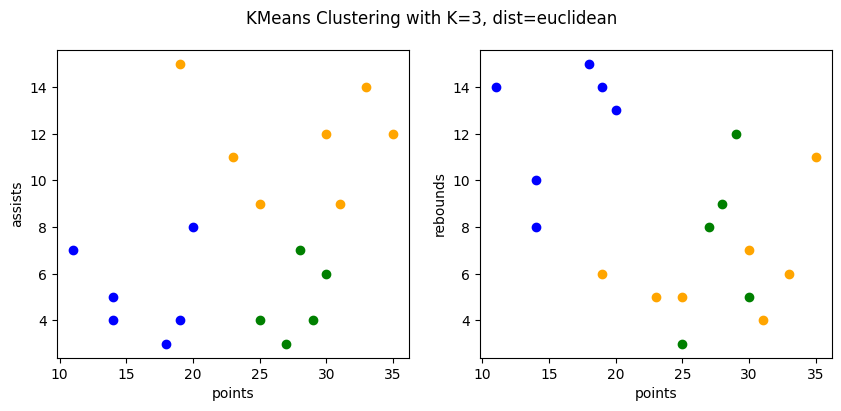

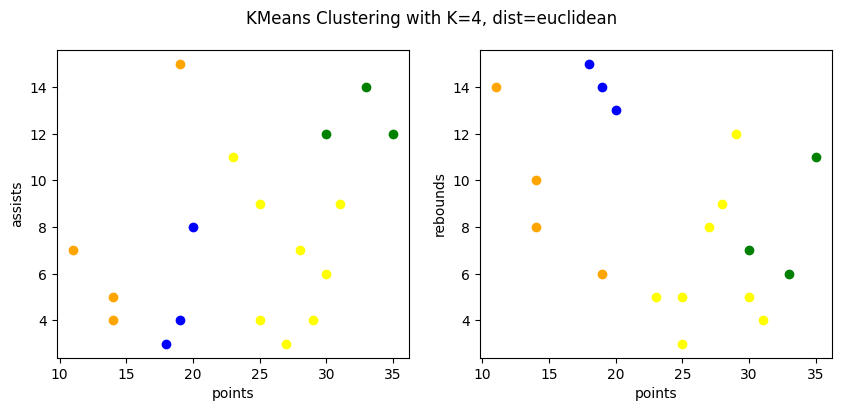

[np.float64(1347.4999999999998), np.float64(597.1428571428571), np.float64(457.82380952380953), np.float64(365.33333333333337)]


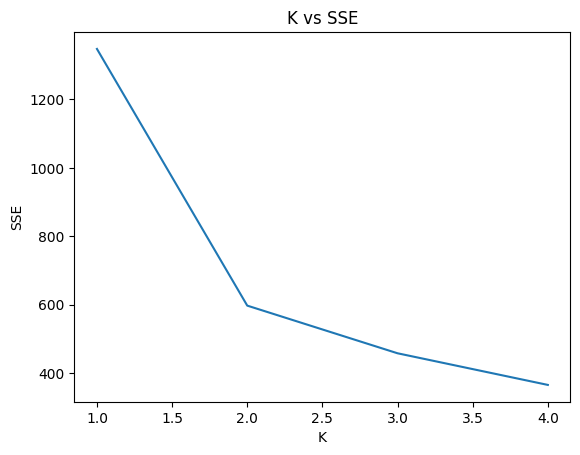

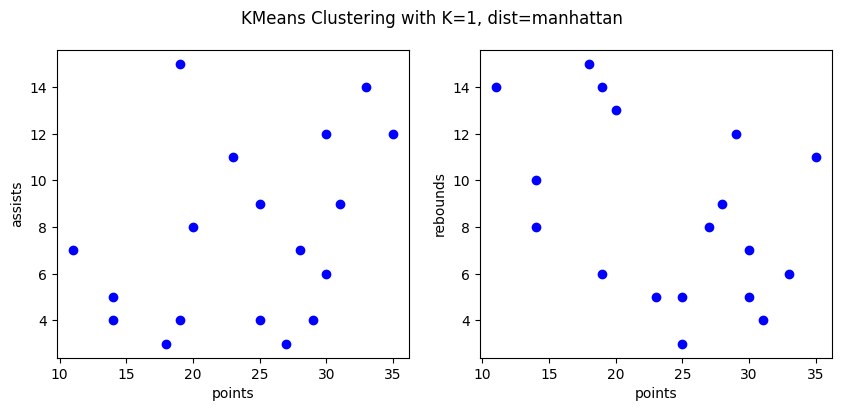

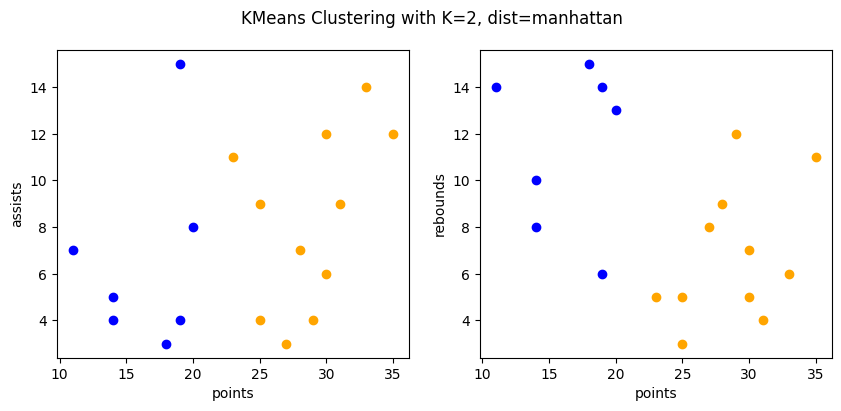

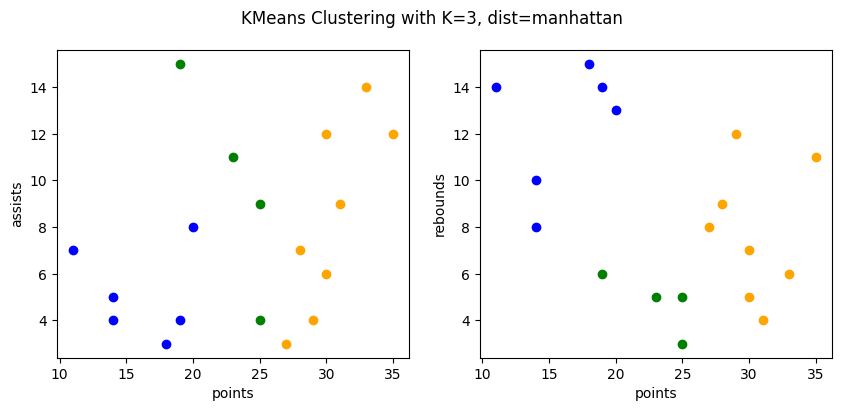

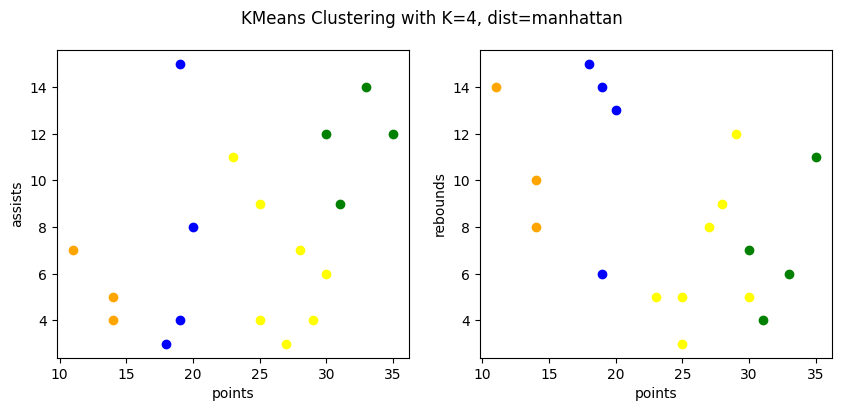

[np.float64(1347.4999999999998), np.float64(597.1428571428571), np.float64(426.9166666666667), np.float64(370.1190476190476)]


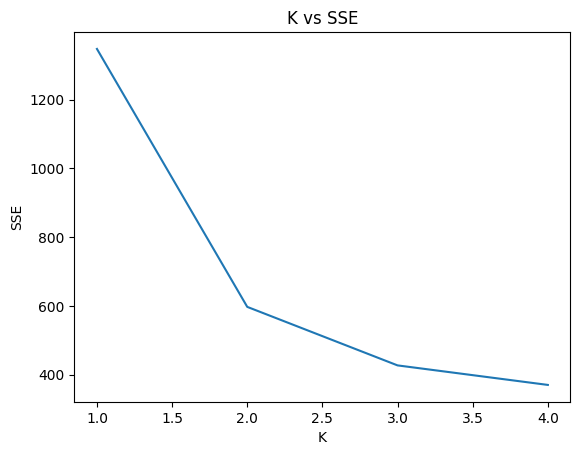

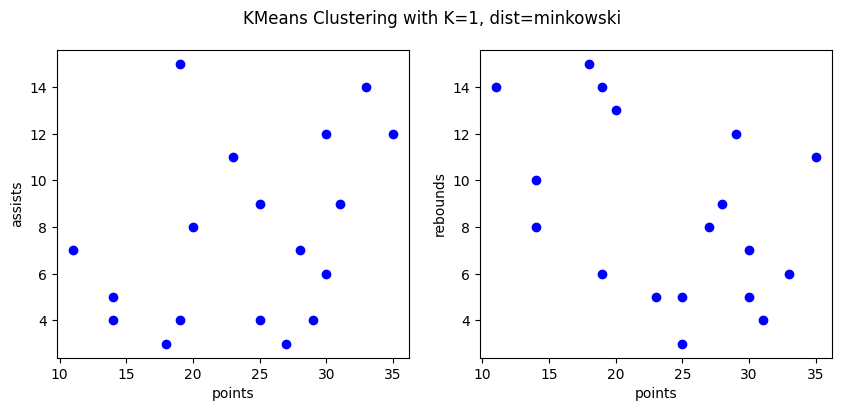

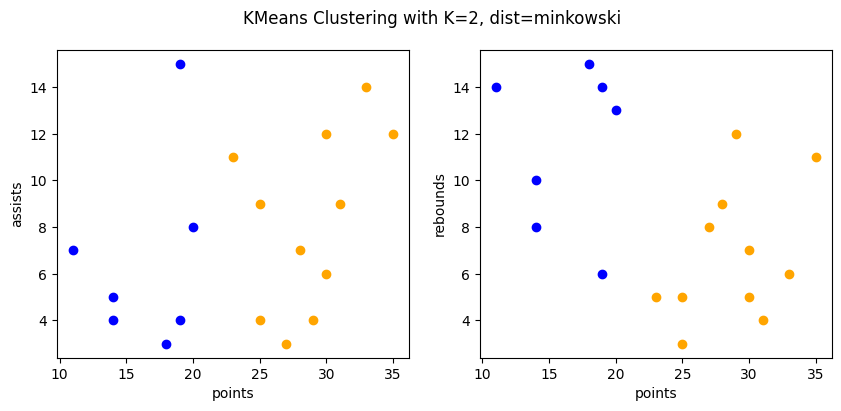

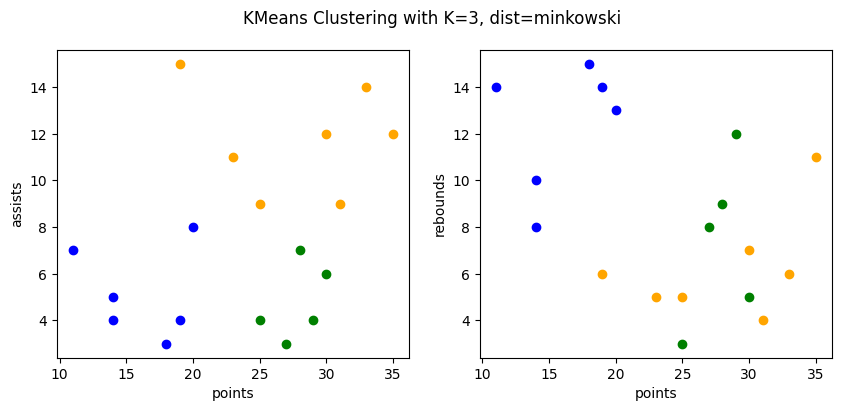

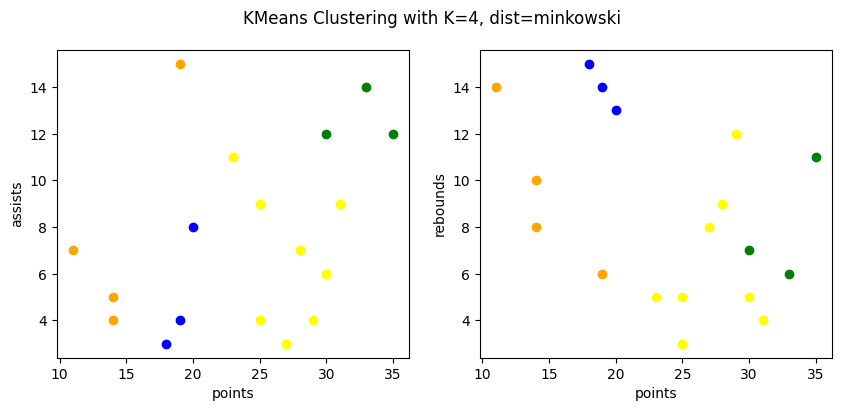

[np.float64(1347.4999999999998), np.float64(597.1428571428571), np.float64(457.82380952380953), np.float64(365.33333333333337)]


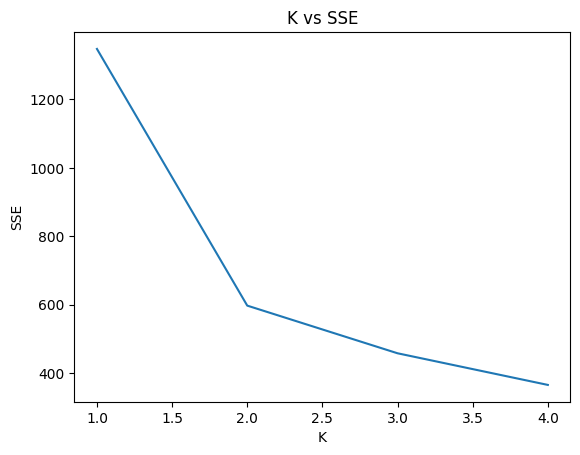

In [113]:
data = df.values
n = len(data)
colors = ['blue', 'orange', 'green', 'yellow']
distances = ["euclidean", "manhattan", "minkowski"]
ks = [1, 2, 3, 4]

for distance in distances:
    sse = []
    for k in ks:
        kmeans = KMeansClustering(k=k, distance=distance)
        kmeans.fit(df.values)
        sse.append(kmeans.SSE(df.values))
    
        labels = kmeans.predict(df.values)
        fig = plt.figure(figsize=(10, 4))
    
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.set_xlabel('points')
        ax1.set_ylabel('assists')
    
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.set_xlabel('points')
        ax2.set_ylabel('rebounds')
    
        for i in range(k):
            ind = [j for j in range(n) if labels[j] == i]
            ax1.scatter(df.loc[ind]['points'], df.loc[ind]['assists'], c=colors[i])
            ax2.scatter(df.loc[ind]['points'], df.loc[ind]['rebounds'], c=colors[i])
        plt.suptitle(f'KMeans Clustering with K={k}, dist={distance}')
        plt.show()
    print(sse)
    
    plt.plot(ks, sse)
    plt.title('K vs SSE')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()